In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("AnomaData.xlsx")
df.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x51,x52,x54,x55,x56,x57,x58,x59,x60,y.1
0,1999-05-01 00:00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0
1,1999-05-01 00:02:00,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,0
2,1999-05-01 00:04:00,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,0
3,1999-05-01 00:06:00,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,0
4,1999-05-01 00:08:00,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,0


### there is a column y.1 extra so remove it 

In [3]:
df.drop("y.1",inplace=True,axis = 1)
df.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x50,x51,x52,x54,x55,x56,x57,x58,x59,x60
0,1999-05-01 00:00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,11.295155,29.984624,10.091721,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076
1,1999-05-01 00:02:00,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,11.290761,29.984624,10.095871,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083
2,1999-05-01 00:04:00,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,11.286366,29.984624,10.100265,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090
3,1999-05-01 00:06:00,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,11.281972,29.984624,10.104660,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097
4,1999-05-01 00:08:00,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,11.277577,29.984624,10.109054,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105


In [4]:
# Display the dimensions of the dataset
print("Dimensions of the dataset:", df.shape)

# Display the data types of each column
print("Data types of each column:")
print(df.dtypes)

Dimensions of the dataset: (18398, 61)
Data types of each column:
time    datetime64[ns]
y                int64
x1             float64
x2             float64
x3             float64
             ...      
x56            float64
x57            float64
x58            float64
x59            float64
x60            float64
Length: 61, dtype: object


In [5]:
df['time'] = pd.to_datetime(df['time'])
df['minute'] = df['time'].dt.minute
df['hour'] = df['time'].dt.hour
df['weekday'] = df['time'].dt.weekday
df.head()

,time,y,x1,x2,x3,x4,x5,x6,x7,x8,...,x54,x55,x56,x57,x58,x59,x60,minute,hour,weekday
0,1999-05-01 00:00:00,0,0.376665,-4.596435,-4.095756,13.497687,-0.118830,-20.669883,0.000732,-0.061114,...,-4.936434,-24.590146,18.515436,3.473400,0.033444,0.953219,0.006076,0,0,5
1,1999-05-01 00:02:00,0,0.475720,-4.542502,-4.018359,16.230659,-0.128733,-18.758079,0.000732,-0.061114,...,-4.937179,-32.413266,22.760065,2.682933,0.033536,1.090502,0.006083,2,0,5
2,1999-05-01 00:04:00,0,0.363848,-4.681394,-4.353147,14.127997,-0.138636,-17.836632,0.010803,-0.061114,...,-4.937924,-34.183774,27.004663,3.537487,0.033629,1.840540,0.006090,4,0,5
3,1999-05-01 00:06:00,0,0.301590,-4.758934,-4.023612,13.161566,-0.148142,-18.517601,0.002075,-0.061114,...,-4.938669,-35.954281,21.672449,3.986095,0.033721,2.554880,0.006097,6,0,5
4,1999-05-01 00:08:00,0,0.265578,-4.749928,-4.333150,15.267340,-0.155314,-17.505913,0.000732,-0.061114,...,-4.939414,-37.724789,21.907251,3.601573,0.033777,1.410494,0.006105,8,0,5


In [6]:
# Check for any duplicate rows
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", duplicate_rows.shape[0])

# Check for unique values in the 'y' column (target variable)
unique_values_y = df['y'].unique()
print("Unique values in 'y' column:", unique_values_y)

Number of duplicate rows: 0
Unique values in 'y' column: [0 1]


In [7]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in the dataset:")
print(missing_values[missing_values!=0])

Missing values in the dataset:
Series([], dtype: int64)


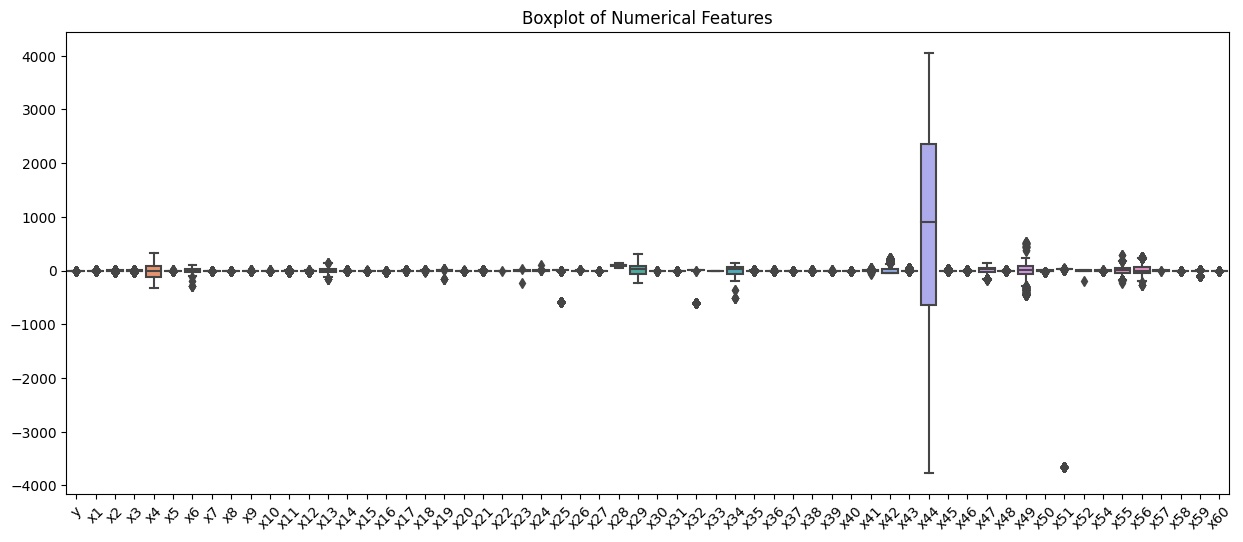

In [8]:
# Select numerical columns for outlier detection
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create box plots for numerical features
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[numerical_columns])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

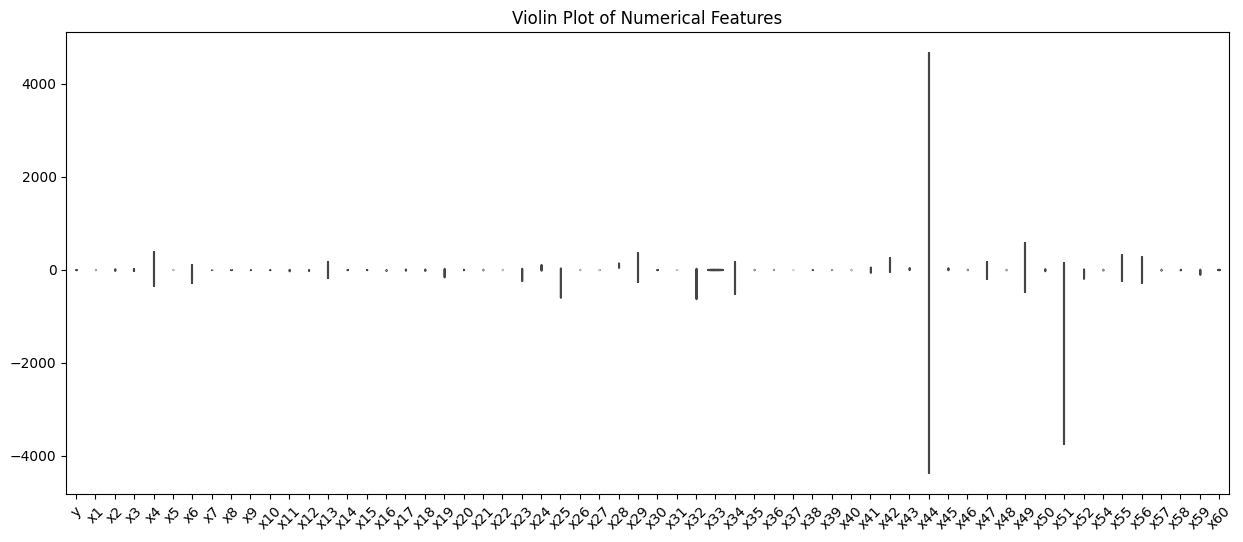

In [9]:
# Create violin plots for numerical features
plt.figure(figsize=(15, 6))
sns.violinplot(data=df[numerical_columns], inner="quartile")
plt.title("Violin Plot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

In [10]:


# Exclude 'time' and 'y' columns from features
X = df.drop(columns=['time', 'y'])

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the data and transform it
X_standardized = scaler.fit_transform(X)

# Convert the standardized data back to a DataFrame
df_standardized = pd.DataFrame(X_standardized, columns=X.columns)

# Add back the 'time' and 'y' columns
df_standardized[['time', 'y']] = df[['time', 'y']]
df = df_standardized

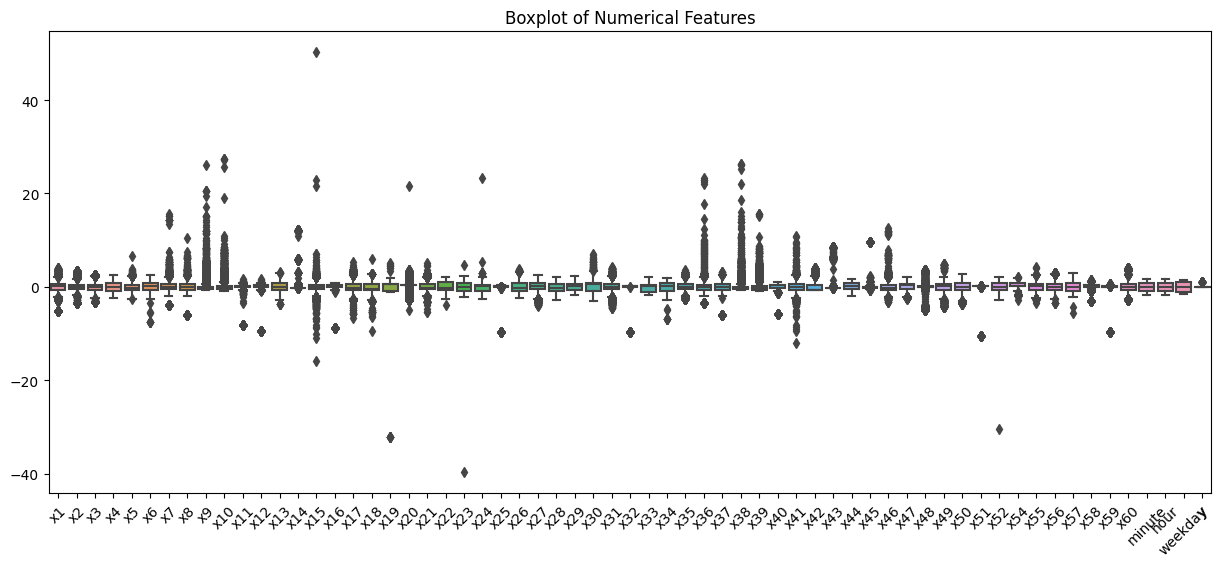

In [11]:
# Select numerical columns for outlier detection
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create box plots for numerical features
plt.figure(figsize=(15, 6))
sns.boxplot(data=df[numerical_columns])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

In [12]:
# Define a function to remove outliers using z-score method
def remove_outliers(df, columns, threshold=4):
    """
    Remove outliers from the dataframe using z-score method.
    
    Parameters:
        df (DataFrame): Input dataframe
        columns (list): List of columns to check for outliers
        threshold (float): Z-score threshold to identify outliers (default: 3)
        
    Returns:
        DataFrame: DataFrame with outliers removed
    """
    df_outliers_removed = df.copy()
    for col in columns:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        df_outliers_removed = df_outliers_removed.loc[z_scores < threshold]
    return df_outliers_removed

# Remove outliers from numerical columns
df_outliers_removed = remove_outliers(df, numerical_columns)

# Display the dimensions of the original and outlier-removed datasets
print("Original dataset dimensions:", df.shape)
print("Outlier-removed dataset dimensions:", df_outliers_removed.shape)


Original dataset dimensions: (18398, 64)
Outlier-removed dataset dimensions: (16037, 64)


In [13]:
# Check for unique values in the 'y' column (target variable)
df_outliers_removed_unique_values_y = df_outliers_removed['y'].unique()
print("Unique values in 'y' column:", df_outliers_removed_unique_values_y)

Unique values in 'y' column: [0]


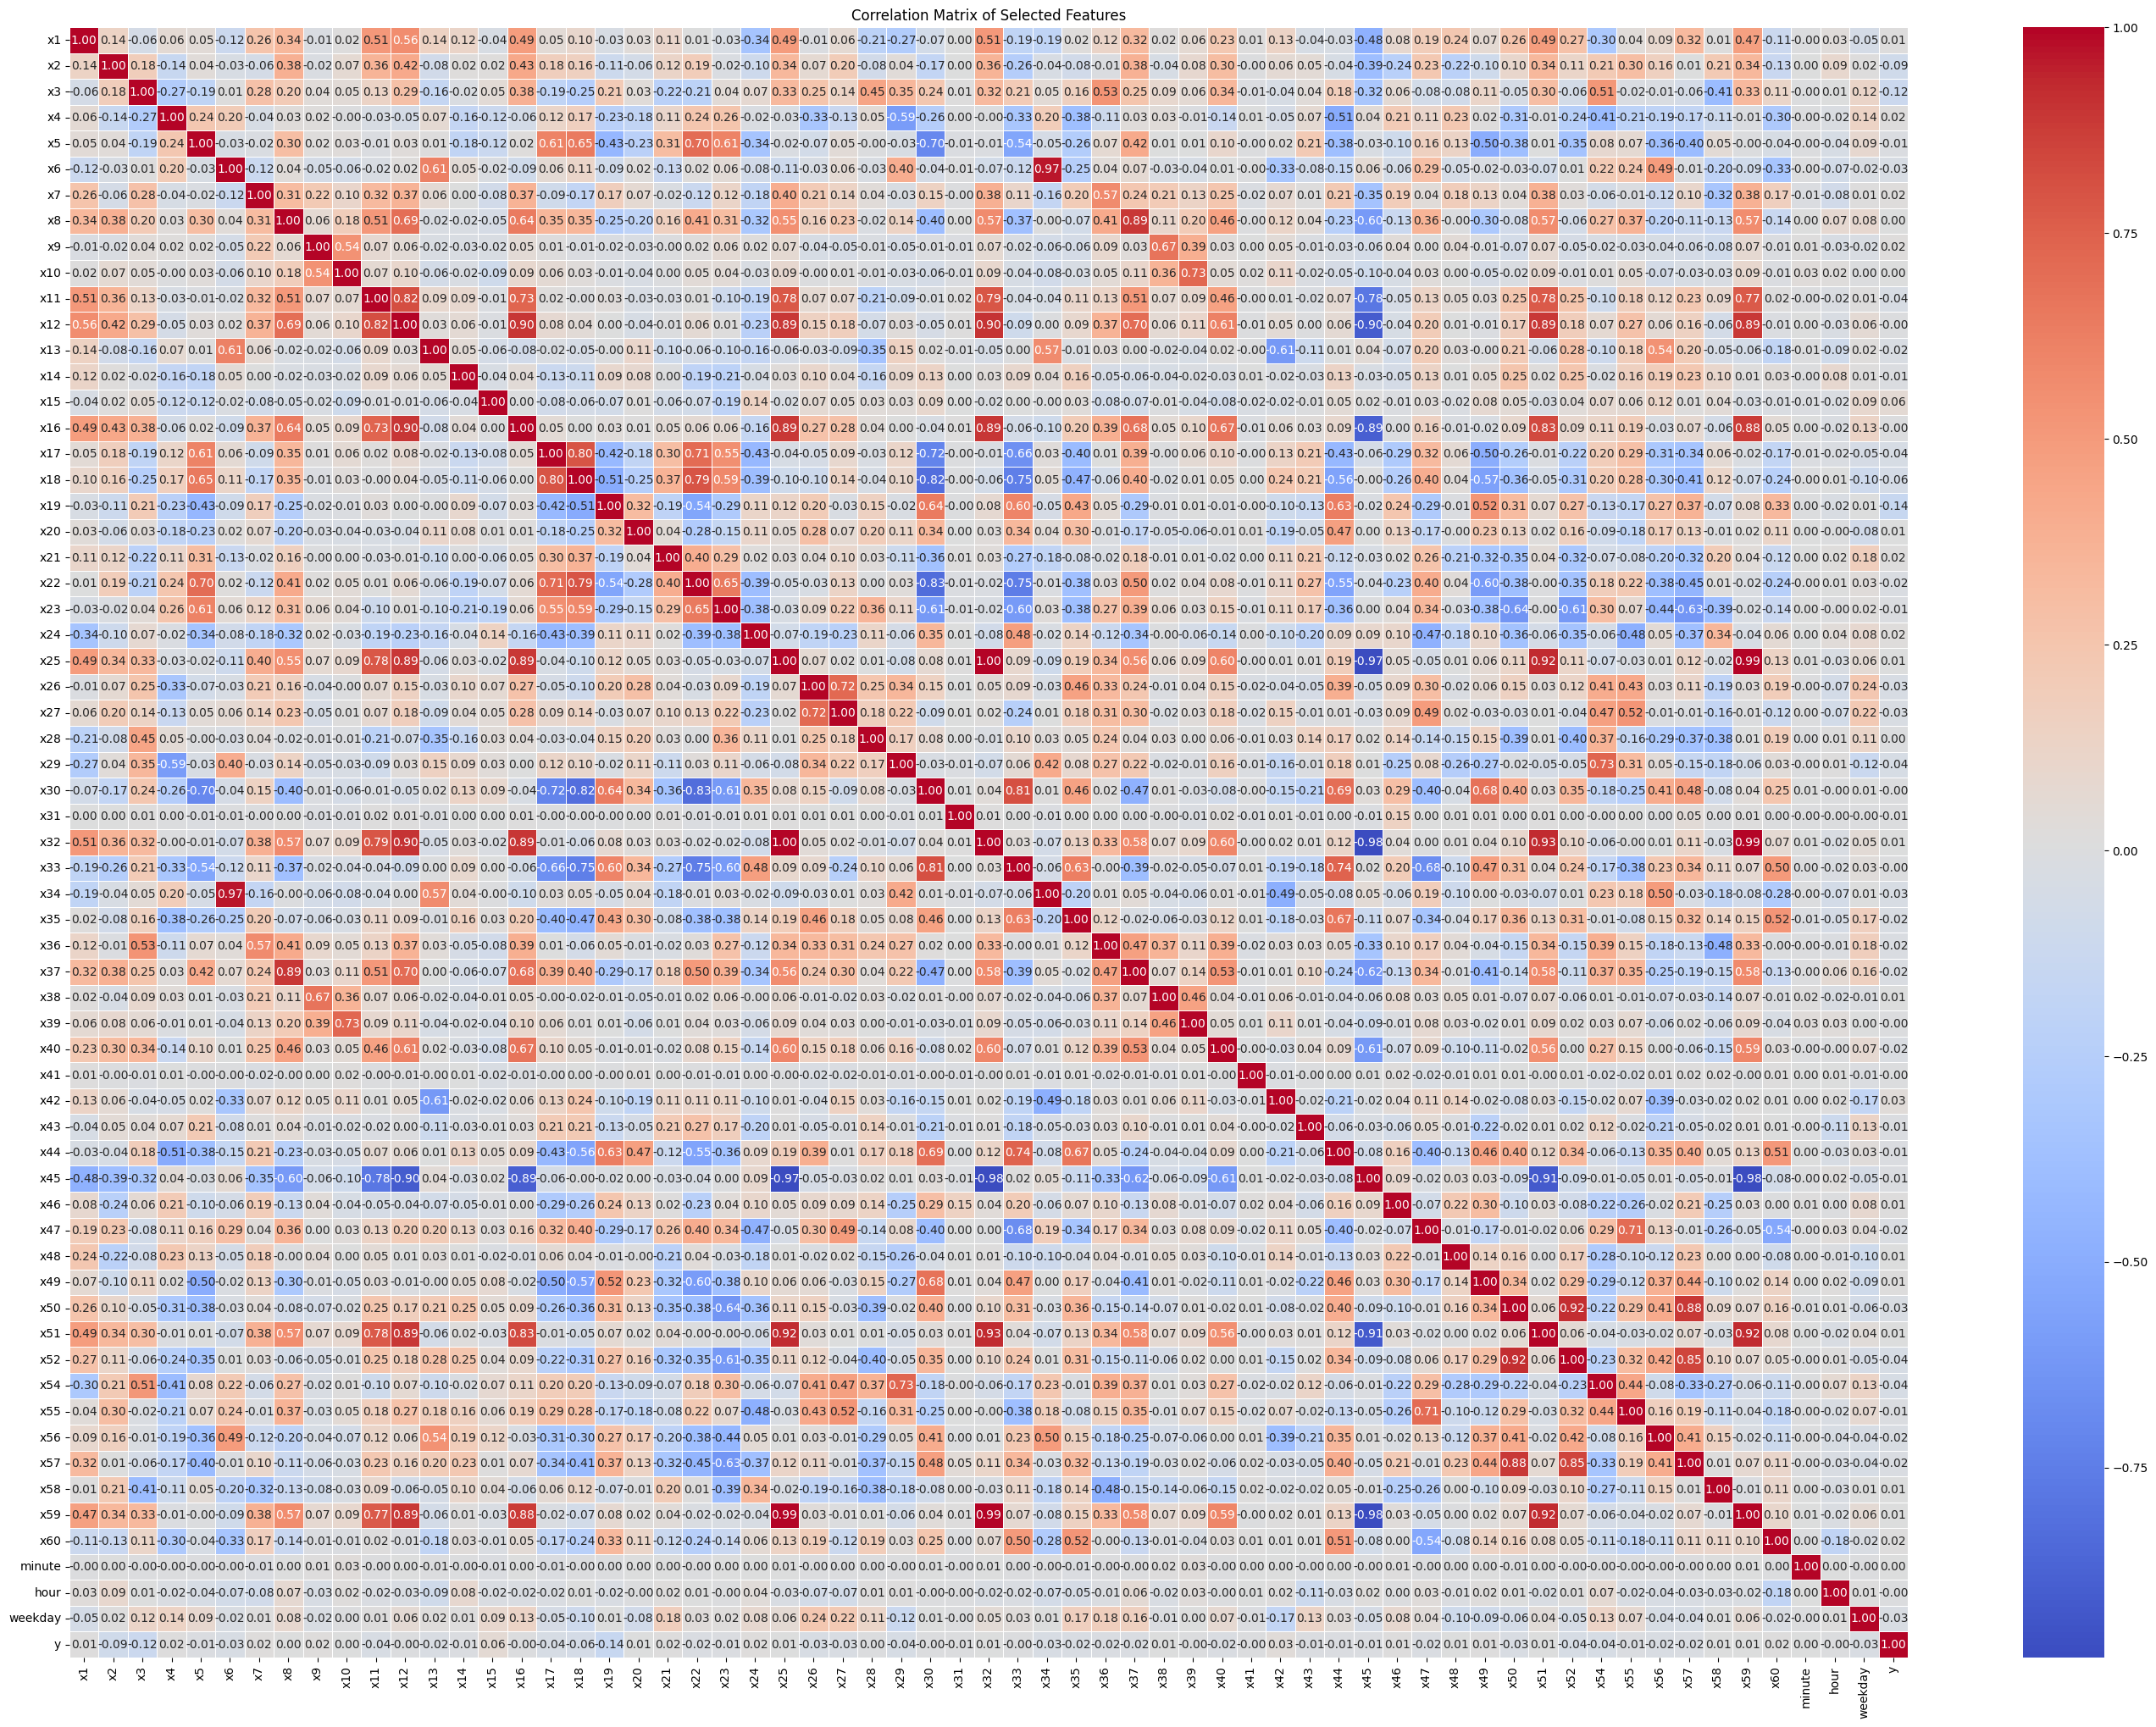

In [14]:
# Compute the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(35, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [15]:
# Perform feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[numerical_columns])

# Perform feature selection using univariate feature selection (SelectKBest with ANOVA F-value)
selector = SelectKBest(score_func=f_classif, k=25)  # Select top 10 features
selected_features = selector.fit_transform(scaled_features, df['y'])

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = [numerical_columns[i] for i in selected_indices]

# Print the names of the selected features
print("Selected features:", selected_feature_names)


Selected features: ['x2', 'x3', 'x6', 'x7', 'x9', 'x11', 'x13', 'x15', 'x17', 'x18', 'x19', 'x24', 'x26', 'x27', 'x29', 'x34', 'x35', 'x37', 'x42', 'x50', 'x52', 'x54', 'x56', 'weekday', 'y']


In [16]:
# Assuming 'y' is the target variable indicating anomalies
X = df.drop(columns=['time','y'])  # Exclude 'time' and 'y' columns from features
y = df['y']

# Define the models
models = {
    'Isolation Forest': IsolationForest(),
    'One-Class SVM': OneClassSVM(),
    'Local Outlier Factor': LocalOutlierFactor()
}

# Define parameter grids for hyperparameter tuning
param_grids = {
    'Isolation Forest': {'contamination': [0.001,0.01,0.1, 0.2, 0.3]},
    'One-Class SVM': {'nu': [0.1, 0.2, 0.3]},
    'Local Outlier Factor': {'contamination': [0.001,0.01,0.1, 0.2, 0.3]}
}

# Perform cross-validation with hyperparameter tuning
for name, model in models.items():
    print(f"Model: {name}")
    param_grid = param_grids[name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1')
    grid_search.fit(X, y)
    
    print("Best Parameters:", grid_search.best_params_)
    print()

    # Evaluate the best model
    best_model = grid_search.best_estimator_
    y_pred = best_model.fit_predict(X)
    y_pred_binary = [1 if pred == -1 else 0 for pred in y_pred]
    print(classification_report(y, y_pred_binary))
    print("----------------------------------------------------------")


Model: Isolation Forest
Best Parameters: {'contamination': 0.001}

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18274
           1       0.00      0.00      0.00       124

    accuracy                           0.99     18398
   macro avg       0.50      0.50      0.50     18398
weighted avg       0.99      0.99      0.99     18398

----------------------------------------------------------
Model: One-Class SVM
Best Parameters: {'nu': 0.1}

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     18274
           1       0.03      0.40      0.05       124

    accuracy                           0.90     18398
   macro avg       0.51      0.65      0.50     18398
weighted avg       0.99      0.90      0.94     18398

----------------------------------------------------------
Model: Local Outlier Factor
Best Parameters: {'contamination': 0.001}

              precision    recall  f1-s

In [17]:
# Assuming 'y' is the target variable indicating anomalies
X = df[selected_feature_names].drop(columns=['y'])  # Exclude 'y' columns from features
y = df['y']

# Define the models
models = {
    'Isolation Forest': IsolationForest(),
    'One-Class SVM': OneClassSVM(),
    'Local Outlier Factor': LocalOutlierFactor()
}

# Define parameter grids for hyperparameter tuning
param_grids = {
    'Isolation Forest': {'contamination': [0.1, 0.2, 0.3]},
    'One-Class SVM': {'nu': [0.1, 0.2, 0.3]},
    'Local Outlier Factor': {'contamination': [0.0001,0.0005,0.00025,0.001,0.01,0.1, 0.2, 0.3]}
}

# Perform cross-validation with hyperparameter tuning
for name, model in models.items():
    print(f"Model: {name}")
    param_grid = param_grids[name]
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='precision')
    grid_search.fit(X, y)
    
    print("Best Parameters:", grid_search.best_params_)
    print()

    # Evaluate the best model
    best_model = grid_search.best_estimator_
    y_pred = best_model.fit_predict(X)
    y_pred_binary = [1 if pred == -1 else 0 for pred in y_pred]
    print(classification_report(y, y_pred_binary))
    print("----------------------------------------------------------")

Model: Isolation Forest
Best Parameters: {'contamination': 0.1}

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     18274
           1       0.03      0.44      0.06       124

    accuracy                           0.90     18398
   macro avg       0.51      0.67      0.50     18398
weighted avg       0.99      0.90      0.94     18398

----------------------------------------------------------
Model: One-Class SVM
Best Parameters: {'nu': 0.1}

              precision    recall  f1-score   support

           0       1.00      0.90      0.95     18274
           1       0.04      0.52      0.07       124

    accuracy                           0.90     18398
   macro avg       0.52      0.71      0.51     18398
weighted avg       0.99      0.90      0.94     18398

----------------------------------------------------------
Model: Local Outlier Factor
Best Parameters: {'contamination': 0.0001}

              precision    recall  f1-sc

In [20]:
best_model = LocalOutlierFactor(contamination=0.0001)

# Train the model on your data
best_model.fit(X)

# Save the model to a file
joblib.dump(best_model, 'best_model_lof.pkl')

['best_model_lof.pkl']